In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")


In [ ]:
dataset.isnull().any()


Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [ ]:
dataset.fillna(dataset.mean(),inplace=True)


In [ ]:
corr_matrix = dataset.corr()
corr_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [ ]:
x=dataset.iloc[:,0:8].values
y=dataset.iloc[:,8].values

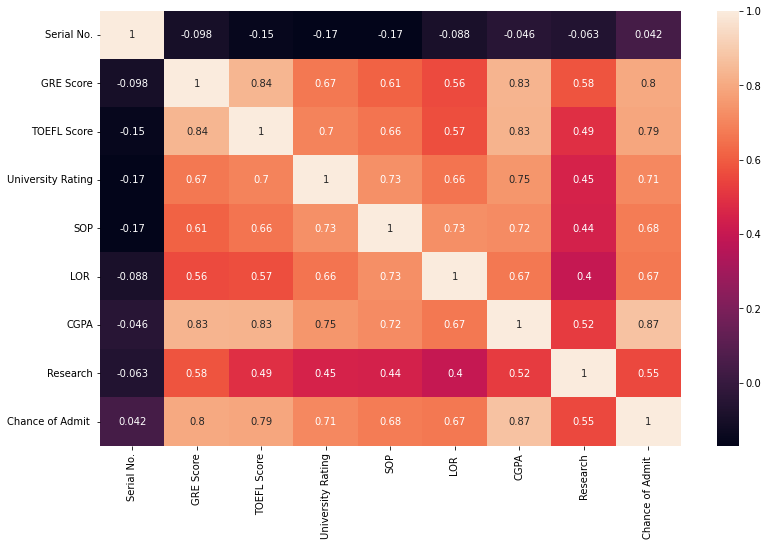

In [ ]:
diag = plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

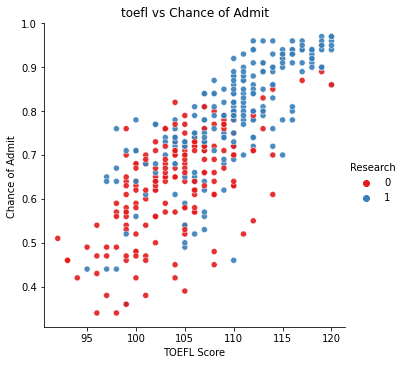

In [ ]:
sns.relplot(data=dataset,x="TOEFL Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.9)
plt.title("toefl vs Chance of Admit")
plt.show()

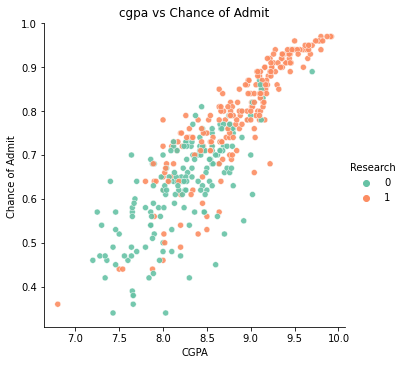

In [ ]:
sns.relplot(data=dataset,x="CGPA",y="Chance of Admit ",hue="Research",
            palette="Set2",alpha=0.9)
plt.title("cgpa vs Chance of Admit")
plt.show()

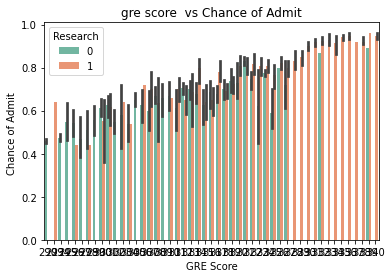

In [ ]:
sns.barplot(data=dataset,x="GRE Score",y="Chance of Admit ",
            palette="Set2",hue="Research")
plt.title("gre score  vs Chance of Admit")
plt.show()

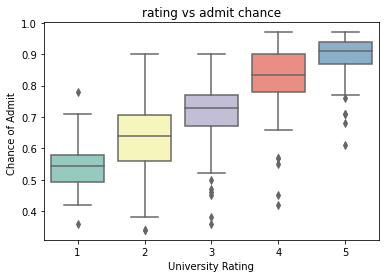

In [ ]:
sns.boxplot(data=dataset,x="University Rating",y="Chance of Admit ",
            palette="Set3")
plt.title("rating vs admit chance")
plt.show()

In [ ]:
X = dataset[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]]
Y = dataset["Chance of Admit "].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=35)

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
y_pred = linear_reg.predict(x_test)
r2score = r2_score(y_test,y_pred)
print("Muti linear reg score is  {:.3f}".format(r2score))

Muti linear reg score is  0.806


In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
y_pred_tree = decision_tree.predict(x_test)
r2score = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2score))

Decision Tree Regression's Score = 0.552


In [ ]:
random_forest = RandomForestRegressor(n_estimators=100,random_state=35)
random_forest.fit(x_train,y_train)
y_pred_rfr = random_forest.predict(x_test)
r2score = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Regression's Score = 0.758


In [ ]:
!pip install ibm_watson_machine_learning


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.6 MB/s 
     |████████████████████████████████| 51 kB 614 kB/s 
     |████████████████████████████████| 824 kB 38.5 MB/s 
     |████████████████████████████████| 133 kB 44.5 MB/s 
     |████████████████████████████████| 547 kB 47.4 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=08fb005668ff68b4c1369be82946fdbc5eeaa7f49a6ee901c73a779c948cb59b
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=444da46785806d962f442efb6b68eede0efde1fd9b1e9a8b1908171f05095dfb
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_